# Model and Data Analysis for One Crops (Banana) Data

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Dataset

# Read the Processed data

In [3]:
df=pd.read_csv('/content/drive/MyDrive/TDS_HW6/Data_ft_banana_1961_2020.csv',index_col=0)
df.head()

,Item Code (CPC),Year,Area harvested,Production,Yield,Precipitation,Minimum Temperature
0,1312,1961,165000,2257000,136788,1286.98,18.14
1,1312,1962,181000,2425000,133978,1169.53,18.03
2,1312,1963,193000,2601000,134767,1149.64,18.16
3,1312,1964,198000,2684000,135556,1189.87,18.14
4,1312,1965,211000,3271000,155024,953.51,18.23


In [4]:
df['Item Code (CPC)'].unique()

array([1312])

In [5]:
df.drop('Item Code (CPC)', axis=1,inplace=True)
#df3.drop('Item Code (CPC)', axis=1, inplace=True)

In [6]:
df.head()

,Year,Area harvested,Production,Yield,Precipitation,Minimum Temperature
0,1961,165000,2257000,136788,1286.98,18.14
1,1962,181000,2425000,133978,1169.53,18.03
2,1963,193000,2601000,134767,1149.64,18.16
3,1964,198000,2684000,135556,1189.87,18.14
4,1965,211000,3271000,155024,953.51,18.23


# Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 60 non-null     int64  
 1   Area harvested       60 non-null     int64  
 2   Production           60 non-null     int64  
 3   Yield                60 non-null     int64  
 4   Precipitation        60 non-null     float64
 5   Minimum Temperature  60 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 3.3 KB


Null Values in Columns

In [8]:
print(df.isnull().sum())

Year                   0
Area harvested         0
Production             0
Yield                  0
Precipitation          0
Minimum Temperature    0
dtype: int64


In [9]:
df.describe()

,Year,Area harvested,Production,Yield,Precipitation,Minimum Temperature
count,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000
mean,1990.500000,444906.166667,1.228265e+07,234331.333333,1112.802333,18.624333
std,17.464249,229661.478829,1.015563e+07,89234.582414,98.926156,0.389795
min,1961.000000,165000.000000,2.257000e+06,119798.000000,874.320000,17.800000
25%,1975.750000,243150.000000,3.671650e+06,152212.750000,1033.825000,18.292500
50%,1990.500000,401800.000000,7.503050e+06,198257.000000,1114.425000,18.650000
75%,2005.250000,593250.000000,1.941530e+07,341973.500000,1187.720000,18.890000
max,2020.000000,884000.000000,3.150400e+07,370367.000000,1320.910000,19.490000


# Feature and Label

In [10]:
X=df.loc[:,['Area harvested','Production','Precipitation','Minimum Temperature']]
Y=df.loc[:,['Yield']]

# Feature Importance

In [11]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,Y)

In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [13]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(5,'Score'))

                 Specs         Score
1           Production  4.954196e+08
0       Area harvested  6.994552e+06
2        Precipitation  5.188672e+02
3  Minimum Temperature  4.813312e-01


# Normalize/Standardize the Dataset

In [16]:
#norm = MinMaxScaler()
norm =StandardScaler()

# transform data
df.iloc[:,1:] = norm.fit_transform(df.iloc[:,1:])

In [17]:
df.head()

,Year,Area harvested,Production,Yield,Precipitation,Minimum Temperature
0,1961,-1.229062,-0.995533,-1.102336,1.775542,-1.253019
1,1962,-1.158807,-0.978851,-1.134092,0.578274,-1.537600
2,1963,-1.106115,-0.961374,-1.125175,0.375518,-1.201277
3,1964,-1.084160,-0.953132,-1.116259,0.785617,-1.253019
4,1965,-1.027077,-0.894844,-0.896251,-1.623803,-1.020180


# Correlation Matrix (Heatmap)

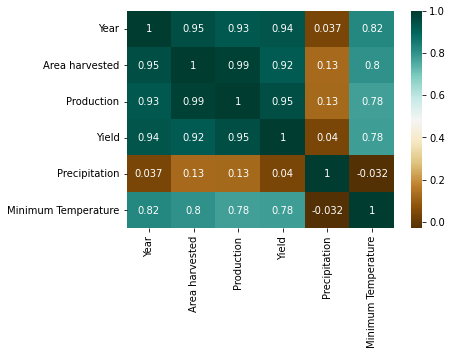

In [18]:
import seaborn as sb

corr = df.corr()

sb.heatmap(corr, cmap="BrBG",annot=True)

# Train test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

We use Mean Squared Error and R2 score to compare and evaluate our models.

**R2 Score:**
The r2 score varies between 0 and 100%. It is closely related to the MSE.

It is  (total variance explained by model) / total variance. So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

**Mean Squared Error:**
Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3), … We square each difference (pred(yn) – yn)) ** 2.

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

regr1 = LinearRegression()

regr1.fit(X_train, y_train)

print(regr1.score(X_test, y_test))

0.9232273623720604


In [21]:
y_pred1=regr1.predict(X_test)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

print('Coefficient of Determination (R2 Score) =',r2_score(y_test, y_pred1))

print('Mean Squared Error = ',mean_squared_error(y_test, y_pred1))

Coefficient of Determination (R2 Score) = 0.9232273623720604
Mean Squared Error =  666316133.6264765


# Bayesian Ridge regressor

In [23]:
from sklearn.linear_model import BayesianRidge

regr2 = BayesianRidge().fit(X_train, y_train)

regr2.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9266503602402453

In [24]:
y_pred2=regr2.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred2))

print('Mean Squared Error= ',mean_squared_error(y_test, y_pred2))

Coefficient of Determination (R2 Score)= 0.9266503602402453
Mean Squared Error=  636607649.2574232


# Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

regr3 = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)

regr3.score(X_test, y_test)

0.9245624646638303

In [26]:
y_pred3=regr3.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred3))

print('Mean Squared Error= ',mean_squared_error(y_test, y_pred3))

Coefficient of Determination (R2 Score)= 0.9245624646638303
Mean Squared Error=  654728669.3353678


# Lasso Regression

In [27]:
from sklearn import linear_model

regr4 = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)

regr4.score(X_test, y_test)

0.9232278419484261

In [28]:
y_pred4=regr4.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred4))

print('Mean Squared Error= ',mean_squared_error(y_test, y_pred4))

Coefficient of Determination (R2 Score)= 0.9232278419484261
Mean Squared Error=  666311971.3431461


# Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

regr5 = RandomForestRegressor(max_depth=3).fit(X_train, y_train)

regr5.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9776163148581787

In [30]:
y_pred5=regr5.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred5))

print('Mean Squared Error= ',mean_squared_error(y_test, y_pred5))

Coefficient of Determination (R2 Score)= 0.9776163148581787
Mean Squared Error=  194269872.71547073


# Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=2)

X_poly=poly_reg.fit_transform(X_train)

regr6=LinearRegression().fit(X_poly,y_train)


In [32]:
X_test_poly=poly_reg.fit_transform(X_test)

regr6.score(X_test_poly, y_test)

0.9892205568906225

In [33]:
y_pred6=regr6.predict(X_test_poly)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred6))

print('Mean Squared Error= ',mean_squared_error(y_test, y_pred6))

Coefficient of Determination (R2 Score)= 0.9892205568906225
Mean Squared Error=  93555686.98961958


# K nearest neighbors

In [34]:
from sklearn import neighbors
from math import sqrt

mse_val = [] 
r2_val=[]

# To find the Optimum K value for KNN Algorithm we use different K values on the model and obsereve the errors to find the best
for K in range(20):
    K = K+1
    regr7 = neighbors.KNeighborsRegressor(n_neighbors = K)

    regr7.fit(X_train, y_train)  #fit the model
    y_pred7=regr7.predict(X_test) #make prediction on test set
    #error = mean_squared_error(y_test,y_pred9) #calculate rmse
    mse_val.append(mean_squared_error(y_test,y_pred7)) #store mse values
    r2_val.append(r2_score(y_test, y_pred7))
    print('MSE value for k= ' , K , 'is:', mean_squared_error(y_test,y_pred7))
    print('R2 score value for k= ' , K , 'is:', r2_score(y_test, y_pred7))
    print('\n')

MSE value for k=  1 is: 85818928.0
R2 score value for k=  1 is: 0.9901119826934047


MSE value for k=  2 is: 81791134.0
R2 score value for k=  2 is: 0.9905760632605659


MSE value for k=  3 is: 109570828.42777772
R2 score value for k=  3 is: 0.9873752996799046


MSE value for k=  4 is: 96205026.921875
R2 score value for k=  4 is: 0.9889153011654379


MSE value for k=  5 is: 109719796.44399992
R2 score value for k=  5 is: 0.9873581356537758


MSE value for k=  6 is: 109736277.19583333
R2 score value for k=  6 is: 0.9873562367491501


MSE value for k=  7 is: 134497133.66326544
R2 score value for k=  7 is: 0.9845033022860665


MSE value for k=  8 is: 154071964.29765624
R2 score value for k=  8 is: 0.9822478993277992


MSE value for k=  9 is: 151178971.36049363
R2 score value for k=  9 is: 0.9825812286398423


MSE value for k=  10 is: 156897580.90750006
R2 score value for k=  10 is: 0.9819223330851174


MSE value for k=  11 is: 147990639.23429757
R2 score value for k=  11 is: 0.98294858679

In [35]:
max(r2_val),min(mse_val)

(0.9905760632605659, 81791134.0)

# ANN

In [36]:
import tensorflow as tf
import keras

In [37]:
from keras.losses import MeanSquaredError
from keras.optimizers import Adam

learning_rate = 0.01

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=16,activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))

#Adding third Hidden Layer
ann.add(tf.keras.layers.Dense(units=2,activation="relu"))  #kernel_initializer='normal', activation='linear'

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,kernel_initializer='normal', activation='linear'))

msle =  MeanSquaredError()

ann.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

In [38]:
history = ann.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 337494867968.0000 - mean_squared_error: 337494867968.0000 - val_loss: 119358439424.0000 - val_mean_squared_error: 119358439424.0000
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 91232796672.0000 - mean_squared_error: 91232796672.0000 - val_loss: 12183066624.0000 - val_mean_squared_error: 12183066624.0000
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 10077478912.0000 - mean_squared_error: 10077478912.0000 - val_loss: 22307315712.0000 - val_mean_squared_error: 22307315712.0000
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 20650436608.0000 - mean_squared_error: 20650436608.0000 - val_loss: 60867334144.0000 - val_mean_squared_error: 60867334144.0000
Epoch 5/100
1/1 [==============================] - 0s 43ms/step - loss: 52764594176.0000 - mean_squared_error: 52764594176.0000 - val_loss: 83954581504.0000 - val_mean_squared_error: 83954581504.000

In [40]:
y_pred8=ann.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred8))
print('Mean Squared Error= ',mean_squared_error(y_test, y_pred8))

1/1 [==============================] - 0s 96ms/step
Coefficient of Determination (R2 Score)= 0.1371630224531376
Mean Squared Error=  7488634187.810559


# Model Comparison

In [41]:
comp=pd.DataFrame({'Models':['Linear Regression', 'Bayesian Ridge regressor', 
                             'Decision Tree Regressor','Lasso Regression',
                             'Random Forest Regressor','Polynomial Regression', 
                             'K Nearest Neighbor', 'Artificial Neural Network'],
                   'Coefficient of Determination (R2 Score) ':[r2_score(y_test, y_pred1)*100,
                                                               r2_score(y_test, y_pred2)*100,
                                                               r2_score(y_test, y_pred3)*100,
                                                               r2_score(y_test, y_pred4)*100,
                                                               r2_score(y_test, y_pred5)*100,
                                                               r2_score(y_test, y_pred6)*100,
                                                               #r2_score(y_test, y_pred7)*100,
                                                               max(r2_val)*100,
                                                               r2_score(y_test, y_pred8)*100,
                                                               ],
                   'Mean Squared Error':[mean_squared_error(y_test, y_pred1),
                                         mean_squared_error(y_test, y_pred2),
                                         mean_squared_error(y_test, y_pred3),
                                         mean_squared_error(y_test, y_pred4),
                                         mean_squared_error(y_test, y_pred5),
                                         mean_squared_error(y_test, y_pred6),
                                         #mean_squared_error(y_test, y_pred7),
                                         min(mse_val),
                                         mean_squared_error(y_test, y_pred8)
                                          ] } )

In [42]:
comp
comp.style.format("{:.1f}")
pd.set_option('display.float_format', str)

In [43]:
comp

,Models,Coefficient of Determination (R2 Score),Mean Squared Error
0,Linear Regression,92.32273623720604,666316133.6264765
1,Bayesian Ridge regressor,92.66503602402453,636607649.2574232
2,Decision Tree Regressor,92.45624646638304,654728669.3353678
3,Lasso Regression,92.32278419484261,666311971.3431461
4,Random Forest Regressor,97.76163148581787,194269872.71547073
5,Polynomial Regression,98.92205568906225,93555686.98961958
6,K Nearest Neighbor,99.05760632605659,81791134.0
7,Artificial Neural Network,13.716302245313761,7488634187.810559


# Best Model 

In [44]:
r2_df =comp.loc[comp.iloc[:,1] == comp.iloc[:,1].max()]

In [45]:
r2_df

,Models,Coefficient of Determination (R2 Score),Mean Squared Error
6,K Nearest Neighbor,99.05760632605659,81791134.0


In [46]:
mse_df=comp.loc[comp.iloc[:,2] == comp.iloc[:,2].min()]

In [47]:
mse_df

,Models,Coefficient of Determination (R2 Score),Mean Squared Error
6,K Nearest Neighbor,99.05760632605659,81791134.0


KNN is the best model with least error and maximum r2 score